In [50]:
import cdlib
import networkx as nx
from cdlib import algorithms
from cdlib import TemporalClustering
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import wordcloud as wd

In [4]:
#Read the word networ and rank for each dataset

g1 = nx.read_edgelist(f"word1_dict.edgelist")
rank1 = pd.read_csv('words_ranking1.csv')
rank1 = rank1.set_index('Word')
g2 = nx.read_edgelist(f"word2_dict.edgelist")
rank2 = pd.read_csv('words_ranking2.csv')
rank2 = rank2.set_index('Word')
g3= nx.read_edgelist(f"word3_dict.edgelist")
rank3 = pd.read_csv('words_ranking3.csv')
rank3 = rank3.set_index('Word')


In [ ]:
#Measure for communities similarity

jaccard = lambda x, y: len(set(x) & set(y)) / len(set(x) | set(y))

In [64]:
#Very Important Word choosen previuosly looking at the communities wordcloud 

viw=['novax', 'guerra', 'finanziaria']

Wordcloud dataset_1


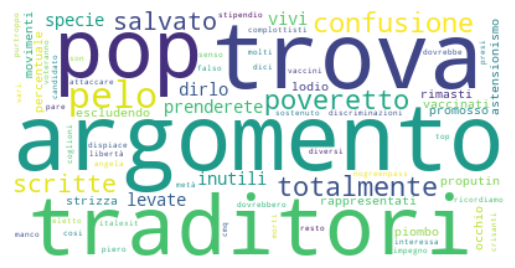

Wordcloud dataset_2


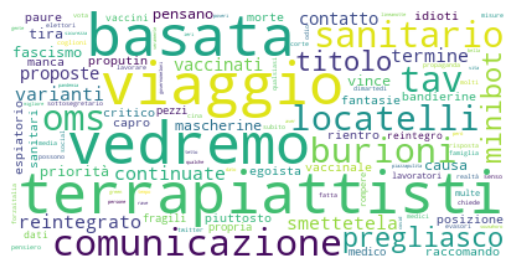

Wordcloud dataset_3


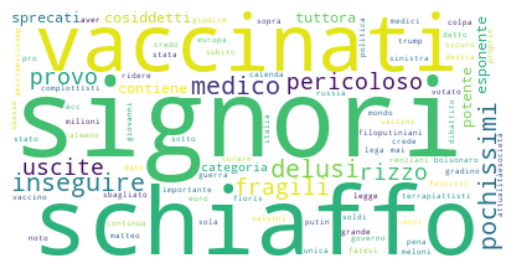

Intersection neighbors 1-2 
 {'elettori', 'renzi', 'però', 'stato', 'lavoro', 'lha', 'visto', 'salvini', 'azione', 'paese', 'partitodemocratico', 'lega', 'ora', 'vota', 'anni', 'senso', 'proputin', 'destra', 'letta', 'due', 'mai', 'vita', 'molti', 'conte', 'covid', 'putin', 'calenda', 'coglioni', 'ecc', 'detto', 'europa', 'gente', 'vaccini', 'vaccinati', 'sinistra', 'fdi', 'meloni'}
 Jaccard=0.1450980392156863
Intersection neighbors 1-3 
 {'renzi', 'vaccino', 'stato', 'proprio', 'salvini', 'colpa', 'complottisti', 'lega', 'sotto', 'destra', 'milioni', 'fascisti', 'mai', 'putin', 'detto', 'calenda', 'ecc', 'europa', 'vaccini', 'vaccinati', 'sinistra', 'meloni'}
 Jaccard=0.10679611650485436
Intersection neighbors 2-3 
 {'aver', 'renzi', 'fragili', 'governo', 'stato', 'salvini', 'medico', 'medici', 'lega', 'subito', 'terrapiattisti', 'destra', 'mai', 'putin', 'detto', 'italia', 'calenda', 'dato', 'europa', 'ecc', 'vaccini', 'vaccinati', 'sinistra', 'meloni'}
 Jaccard=0.11320754716981132
W

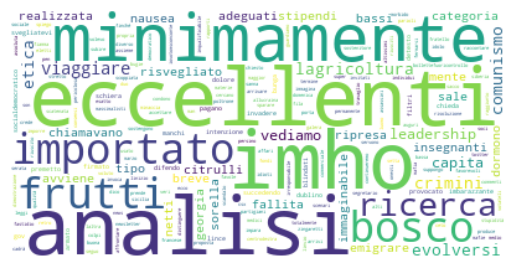

Wordcloud dataset_2


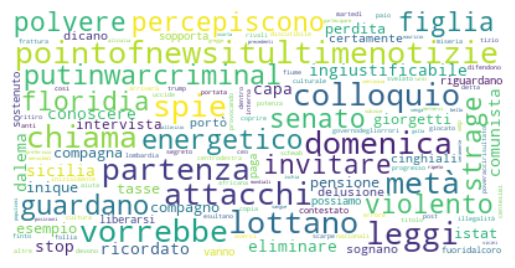

Wordcloud dataset_3


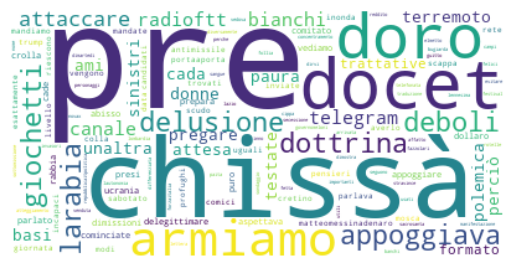

Intersection neighbors 1-2 
 {'serve', 'vai', 'sparare', 'tanti', 'giorno', 'anno', 'andate', 'potere', 'allucraina', 'stelle', 'fate', 'uniti', 'scritto', 'piuttosto', 'salvini', 'giorgia', 'ultimi', 'media', 'commerciale', 'bel', 'sanno', 'volte', 'son', 'sotto', 'anni', 'esempio', 'domenica', 'reddito', 'voti', 'italiano', 'orban', 'fascisti', 'propaganda', 'vita', 'modo', 'pur', 'vaccini', 'totalmente', 'litalia', 'bonino', 'finto', 'meloni', 'risoluzione', 'spalle', 'vero', 'verso', 'nazi', 'ecco', 'tramite', 'crimea', 'pochi', 'morire', 'rotto', 'europei', 'successo', 'eliminare', 'contrario', 'mondo', 'adesso', 'due', 'debito', 'blocco', 'nelleuropa', 'coinvolgere', 'nazione', 'der', 'travaglio', 'verrà', 'italia', 'mentre', 'rdc', 'altre', 'cazzate', 'roma', 'linflazione', 'conseguenze', 'popolo', 'draghi', 'lumanità', 'stato', 'uscire', 'volete', 'prossimo', 'pagare', 'presidente', 'scoppiata', 'indietro', 'finirà', 'caro', 'riferimento', 'momento', 'basta', 'devo', 'altri', '

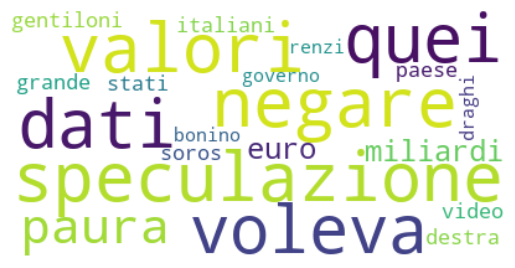

Wordcloud dataset_2


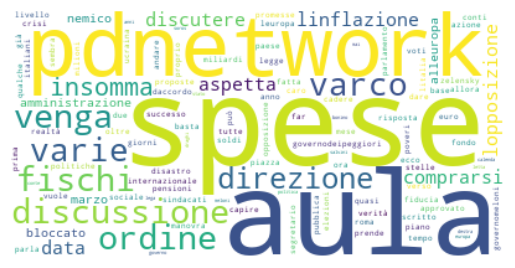

Wordcloud dataset_3


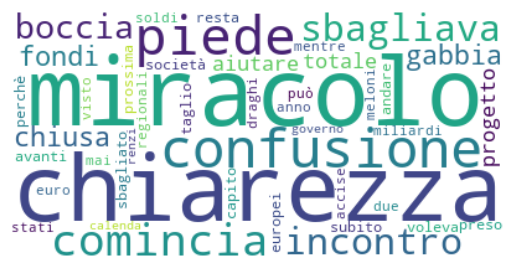

Intersection neighbors 1-2 
 {'italiani', 'draghi', 'soros', 'paese', 'bonino', 'governo', 'euro', 'miliardi', 'destra'}
 Jaccard=0.07142857142857142
Intersection neighbors 1-3 
 {'renzi', 'draghi', 'stati', 'governo', 'voleva', 'euro', 'miliardi'}
 Jaccard=0.1206896551724138
Intersection neighbors 2-3 
 {'draghi', 'due', 'governo', 'calenda', 'anno', 'mai', 'meloni', 'euro', 'può', 'soldi', 'andare', 'miliardi'}
 Jaccard=0.0821917808219178


In [70]:
#For each viw make a wordcloud for each network, and compute pairs intersection and Jaccard

for j in viw:
    c1=list(nx.neighbors(g1, j))
    c2=list(nx.neighbors(g2, j))
    c3=list(nx.neighbors(g3, j))
    k=1
    #NB: using reversed list may be more intresting
    c1.reverse()
    c2.reverse()
    c3.reverse()
    for i in (c1, c2, c3):
        print(f"Wordcloud dataset_{k}")
        # Use worrcloud to visualize
        my_string=' '.join(map(str,i ))  
        text = my_string
        # Create and generate a word cloud image:
        wordcloud = wd.WordCloud(background_color="white").generate(text)

        # Display the generated image:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        k+=1

    print(f"Intersection neighbors 1-2 \n {set(c1) & set(c2)}\n",f"Jaccard={jaccard(c1,c2)}")
    print(f"Intersection neighbors 1-3 \n {set(c1) & set(c3)}\n",f"Jaccard={jaccard(c1,c3)}")
    print(f"Intersection neighbors 2-3 \n {set(c2) & set(c3)}\n",f"Jaccard={jaccard(c2,c3)}")

In [74]:
c1=list(nx.neighbors(g1, 'vaccino'))
print(f"Neighbors 1 \n" )
for i in list(nx.neighbors(g1, 'vaccino')):
    print(f"{i} : {rank1.loc[i]['Count']}")
c2=list(nx.neighbors(g2, 'vaccino'))
print(f"\n Neighbors 2 \n" )
for i in list(nx.neighbors(g2, 'vaccino')):
    print(f"{i} : {rank2.loc[i]['Count']}")
c3=list(nx.neighbors(g3, 'vaccino'))
print(f"\n Neighbors 3 \n" )
for i in list(nx.neighbors(g3, 'vaccino')):
    print(f"{i} : {rank3.loc[i]['Count']}")
   

Neighbors 1 

renzi : 5951
calenda : 5661
meloni : 6832
salvini : 5524
giorgia : 834
letta : 6193
conte : 6378
draghi : 2421
lega : 5338
partitodemocratico : 1905
elezionipolitiche : 1505
fdi : 970
elezioni : 2114
enrico : 316
europa : 3239
credo : 1007
mai : 2163
sinistra : 1523
stato : 1946
politica : 1666
partito : 1702
fratelli : 268
ditalia : 340
anni : 2099
settembrevotolega : 151
sanzioni : 450
green : 165
pass : 160
voti : 1412
enricoletta : 204
altri : 1293
fratelliditalia : 241
giorgiameloni : 178
italiani : 1239
settembre : 916
nato : 399
ucraina : 419
primo : 546
vota : 753
cinquestelle : 115
gas : 631
votato : 768
grande : 848
fascista : 348
visto : 897
usa : 545
proprio : 1158
diritti : 397
paese : 1135
covid : 295
speranza : 427
greenpass : 189
cdx : 460
preso : 428
programma : 831
volta : 668
grillo : 167
infatti : 498
lagenda : 115
stata : 672
pro : 211
adesso : 632
governare : 319
fuori : 786
niente : 686
mentre : 500
volte : 448
vita : 547
persone : 728
vero : 811
na